In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales #Importamos lo que necesitamos de scikit
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

# Ejercicio 1

In [3]:
x=np.array([1,2,3])
y=1
print(x-y) #funciona con np.array

# ejemplo
x_1 = [1 for i in range(10)]
print(x_1)

[0 1 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
def coefs_rl(x,y):
  x_med= np.mean(x)
  y_med= np.mean(y)

  beta_1= np.sum((x-x_med)*(y-y_med))/np.sum((x-x_med)**2)
  beta_2= y_med - beta_1 * x_med
  return beta_1,beta_2

In [5]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


In [6]:
from gapminder import gapminder

In [7]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
datos= gapminder[['year','lifeExp']]
print(coefs_rl(datos['year'],datos['lifeExp']))

(0.3259038276371516, -585.6521874415444)


In [9]:
modelo= linear_model.LinearRegression()
modelo.fit(datos[['year']],datos[['lifeExp']])
beta_1= modelo.coef_
beta_0= modelo.intercept_
print(beta_1, beta_0)

[[0.32590383]] [-585.65218744]


# Ejercicio 2

In [6]:
datos= pd.read_csv('..\Labo de datos\inmuebles.csv')
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


(a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie
y el precio de cada imueble.

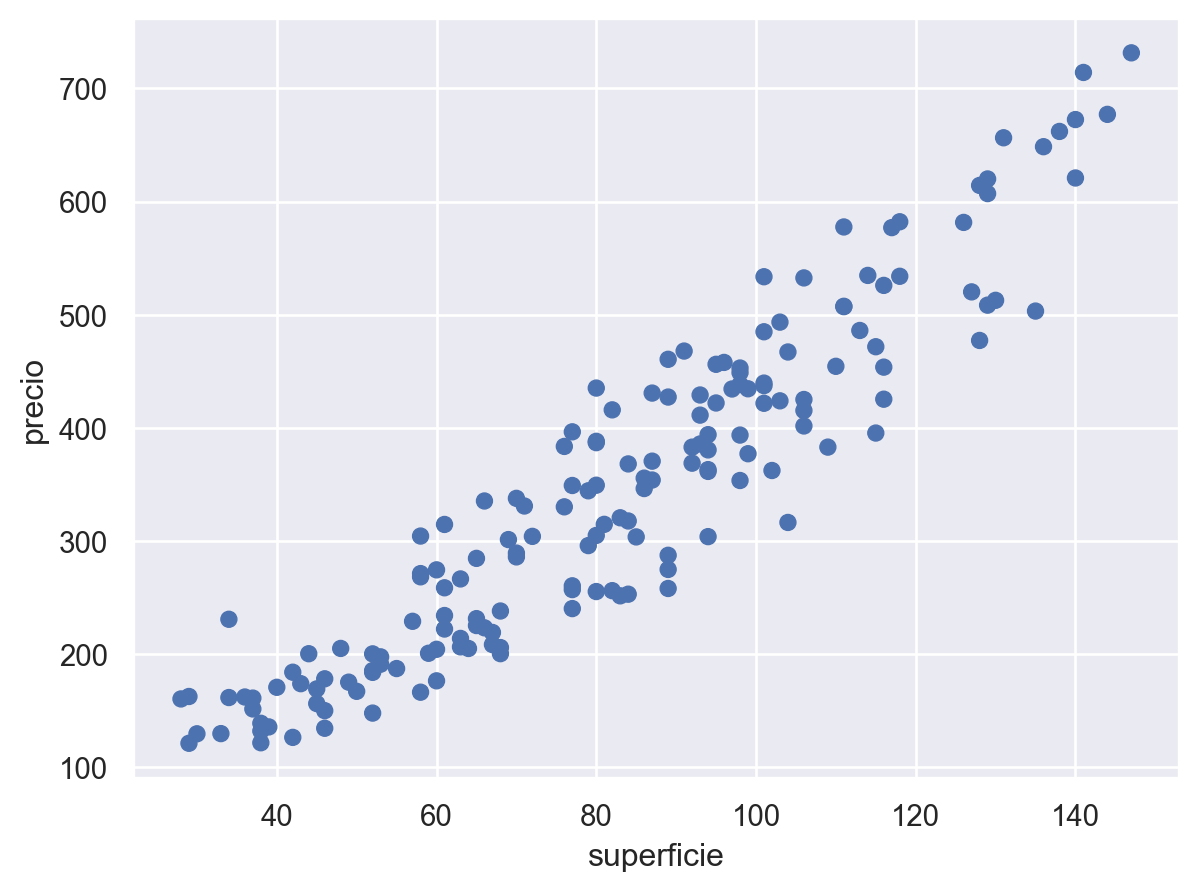

In [7]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
)

(b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse
“Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga
“Regresión”.

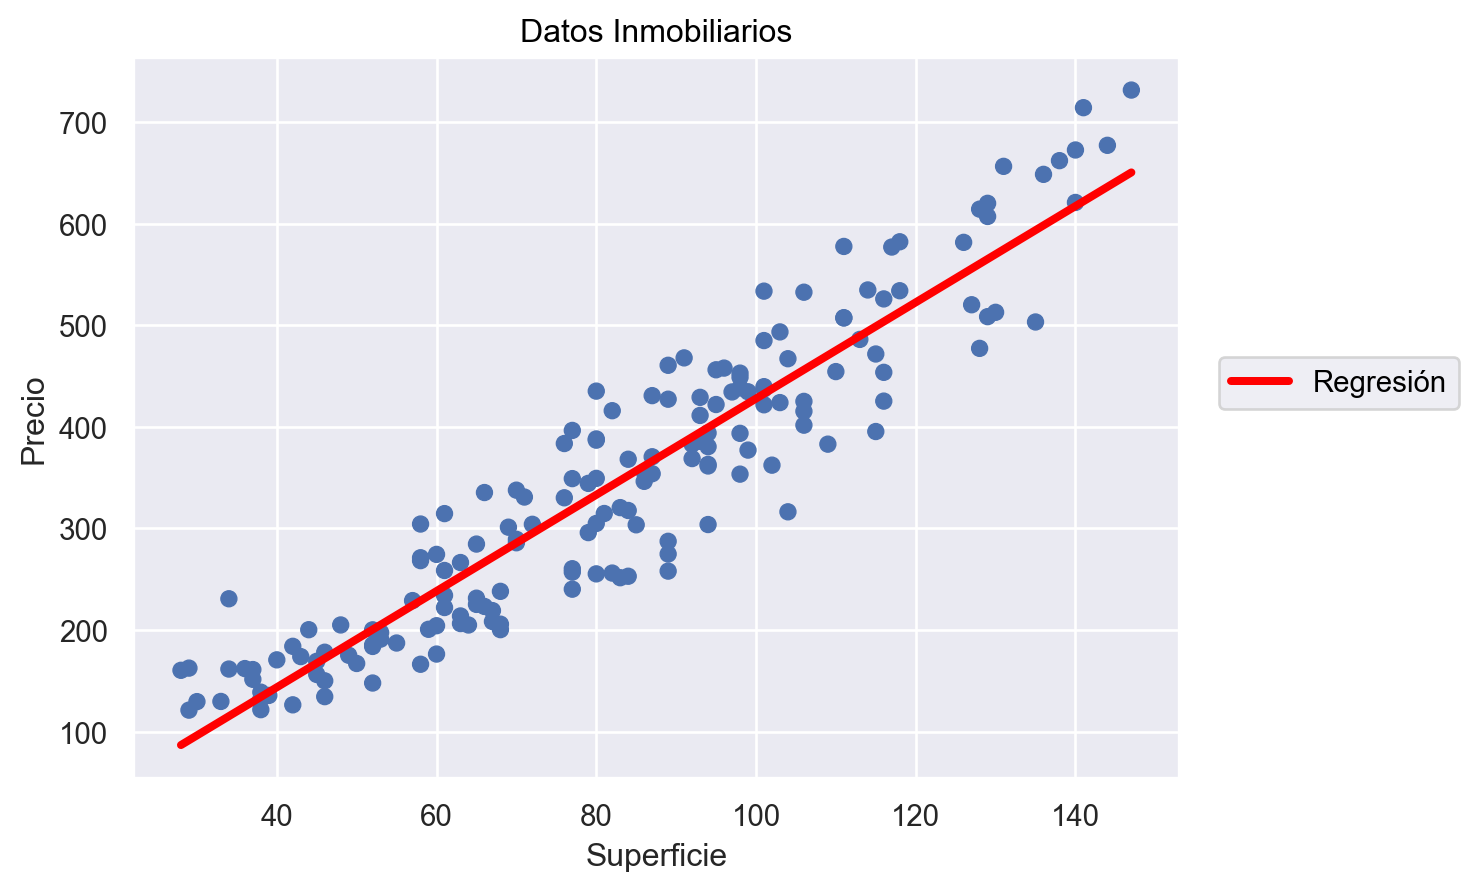

In [8]:
(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresión')    # Agregamos una etiqueta para la leyenda del grafico #El numero adentro de PolyFit te dice el grado del polinomio
    .label(title='Datos Inmobiliarios', x='Superficie', y='Precio')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes

)

(c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué
podríamos interpretar sobre el costo del metro cuadrado en la ciudad?


In [9]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(datos[['superficie']], datos['precio'])   # Realizamos el ajuste, la perte de y puede ir con corchete simple
beta_1 = modelo.coef_   # Con .coef_ recuperamos el valor de beta_1 (dentro de un array)
beta_0 = modelo.intercept_   # Con .intercept_ recuperamos el valor de beta_0 (dentro de  un array)
print(beta_1[0],beta_0)

4.73579682230239 -45.73153403092567


¿Qué podríamos interpretar sobre el costo del metro cuadrado de la ciudad?

EL metro cuadrado es igual a 4 veces el valor de la superficie menos $45

(d) Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones:
una que calcule el error cuadrático medio (ECM) y otra que calcule el coeficiente de
determinación R2

In [10]:
def ecm(x,y,pendiente,o_origen):
  y_pred= o_origen + pendiente*x
  diff= y-y_pred
  return np.sum(np.mean(diff)*diff)

def r_cuad(x,y,pendiente,o_origen):
  y_pred= o_origen + pendiente*x # y gorrito
  y_med= np.mean(y)
  diff_1= y_pred - y_med
  diff_2= y - y_med
  return np.sum(diff_1**2)/np.sum(diff_2**2)


(e) Utilizando las funciones implementadas en el ítem anterior, calcular el ECM y el R2 del
ajuste realizado en el item b). ¿En qué unidades está cada medida? ¿Cómo podemos
interpretarlas?


In [11]:
print(ecm(datos['superficie'],datos['precio'],beta_0,beta_1[0]),
r_cuad(datos['superficie'],datos['precio'],beta_0,beta_1[0])
)

2831514520.8504486 870.0272667434003


(f) Comparar los resultados obtenidos en el ítem anterior con los proporcionados por r2_score
y mean_squared_error de scikit-learn


In [12]:
y_pred = modelo.predict(datos[['superficie']]) #es el y^^
r2_score(datos[['precio']], y_pred)

0.8762114698357936

In [13]:
mean_squared_error(datos[['precio']], y_pred) #esta en $², se suele sacar raiz cuadrada para poder comparar bien

2630.9300019446955

In [14]:
def ecm(x,y,pendiente,o_origen):
  y_pred= o_origen + pendiente*x
  n= len(x)**(-1)
  return np.sum((y-y_pred)**2)*n

def r_cuad(x,y,pendiente,o_origen):
  y_pred= o_origen + pendiente*x
  y_med= np.mean(y)
  div_1= np.sum((y_pred-y_med)**2)
  div_2= np.sum((y - y_med)**2)
  return div_1/div_2

In [15]:
ecm_cande= ecm(x= datos['superficie'], y= datos['precio'], pendiente= beta_1, o_origen=beta_0)
ecm_= mean_squared_error(datos['precio'] ,modelo.predict(datos[['superficie']]))
print(ecm_cande, ecm_)

2630.9300019446955 2630.9300019446955


In [16]:
r2_cande= r_cuad(x= datos['superficie'], y= datos['precio'], pendiente= beta_1, o_origen=beta_0)
r2_= r2_score(datos[['precio']], modelo.predict(datos[['superficie']]))

print(r2_cande, r2_)

0.8762114698357931 0.8762114698357936


(g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad
de precios. ¿Hay algún outlier?


<AxesSubplot: xlabel='zona', ylabel='precio'>

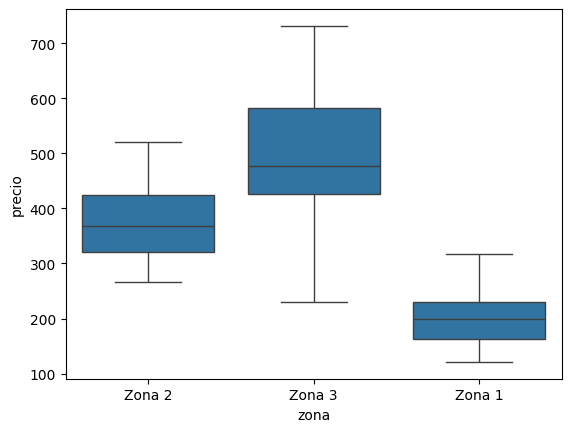

In [17]:
sns.boxplot(data=datos, x='zona', y='precio')

La zona 3 es la de mayor variabilidad de precios. Por otro lado, no hay ningun outlier

(h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta
que mejor aproxima a los datos

In [27]:
datos_z1=datos[datos['zona']=='Zona 1'] #datos filtrados zona 1
modelo1 = linear_model.LinearRegression()
modelo1.fit(datos_z1[['superficie']], datos_z1['precio'])
z1_beta_1 = modelo1.coef_
z1_beta_0 = modelo1.intercept_
y_pred = modelo1.predict(datos_z1[['superficie']])
z1_r2 = r2_score(datos_z1.superficie,y_pred)
z1_mse = mean_squared_error(datos_z1.superficie,y_pred)
print("R_2 y MSE de la Zona 1:",z1_r2,z1_mse)

R_2 y MSE de la Zona 1: -61.43510957462207 20600.52232734391


In [19]:
datos_z2 = datos[datos['zona'] == 'Zona 2']
modelo2 = linear_model.LinearRegression()
modelo2.fit(datos_z2[['superficie']], datos_z2['precio'])
z2_beta_1 = modelo2.coef_
z2_beta_0 = modelo2.intercept_
y2_pred = modelo2.predict(datos_z2[['superficie']])
z2_r2 = r2_score(datos_z2['superficie'], y2_pred)
z2_mse = mean_squared_error(datos_z2.superficie, y2_pred)
print("R_2 y MSE de la Zona 2:",z2_r2,z2_mse)

R_2 y MSE de la Zona 2: -214.34406677154752 82801.61637659515


In [22]:
datos_z3 = datos[datos['zona'] == 'Zona 3']
modelo3 = linear_model.LinearRegression()
modelo3.fit(datos_z3[['superficie']], datos_z3['precio'])
z3_beta_1 = modelo3.coef_
z3_beta_0 = modelo3.intercept_
y3_pred = modelo3.predict(datos_z3[['superficie']])
z3_r2 = r2_score(datos_z3['superficie'], y3_pred)
z3_mse = mean_squared_error(datos_z3.superficie, y3_pred)
print("R_2 y MSE de la Zona 3:",z3_r2,z3_mse)

R_2 y MSE de la Zona 3: -263.3730480854171 162198.25802699194


(i) Graficar los datos y el ajuste lineal de cada zona utilizando el método facet() de Plot()
(recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?
¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?

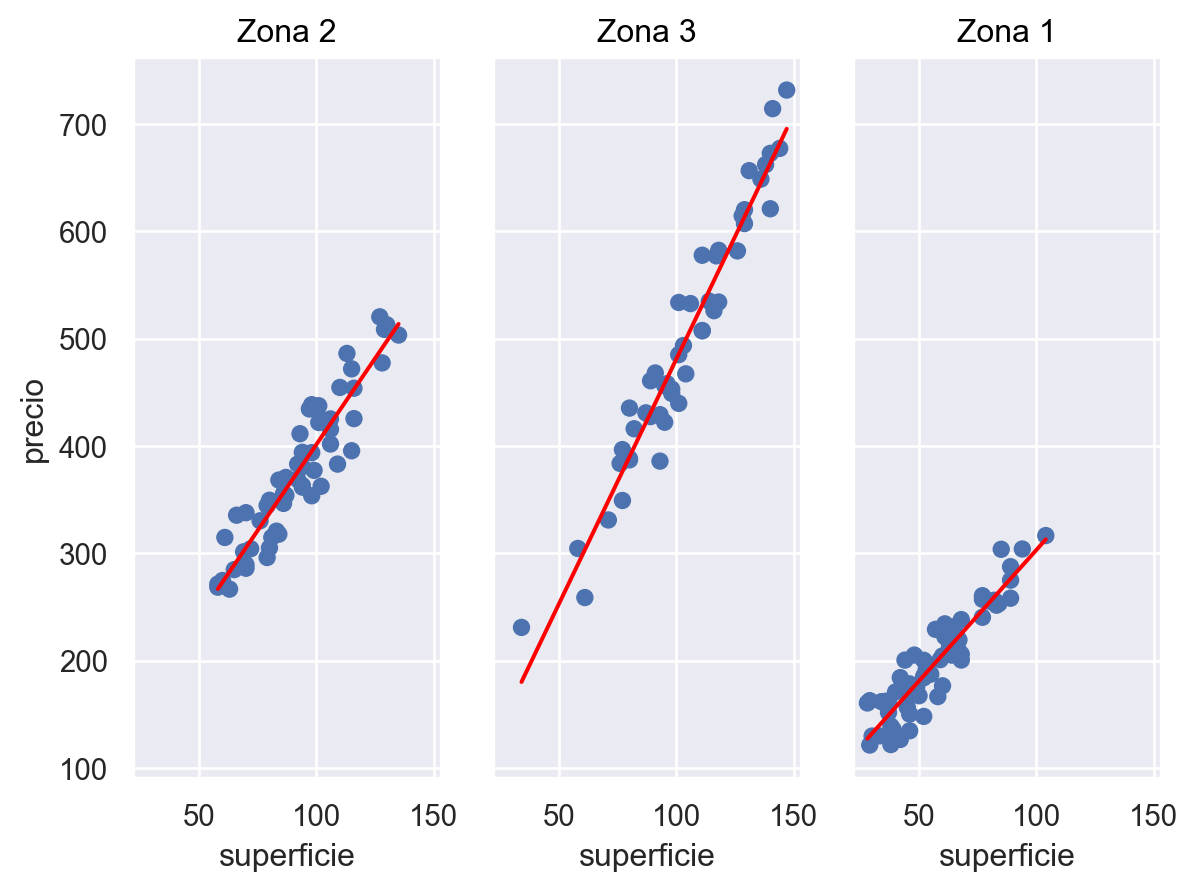

In [21]:
grafico= (
    so.Plot(datos, x='superficie', y='precio')
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))
)
grafico.facet("zona")

In [24]:
modelo1.predict([[1]])[0]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.29408162947443

(j) Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo el valor calculado anteriormente?


In [30]:
print("Precio con el modelo general:", modelo.predict([[105]]))
print("Precio con el modelo de la Zona 2:",modelo2.predict([[105]]))

Precio con el modelo general: [451.52713231]
Precio con el modelo de la Zona 2: [503.82363353]


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(k) Si me ofrecen un inmueble de 100 m2
en la Zona 2 a un precio de 300, ¿qué tan barato o
caro es respecto a su precio de referencia?


In [32]:
print("Precio segun nuestro modelo:",modelo2.predict([[100]])[0])

Precio segun nuestro modelo: 481.02091217968035


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Es barato segun el precio de referencia

(l) Efecto de los outliers. En este item trabajaremos con los datos de inmuebles_outliers.csv,
que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers.

i. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers.

ii. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos
en el ítem h)


In [34]:
datos_outliers = pd.read_csv("..\Labo de datos\inmuebles_outliers.csv")

<AxesSubplot: xlabel='zona', ylabel='precio'>

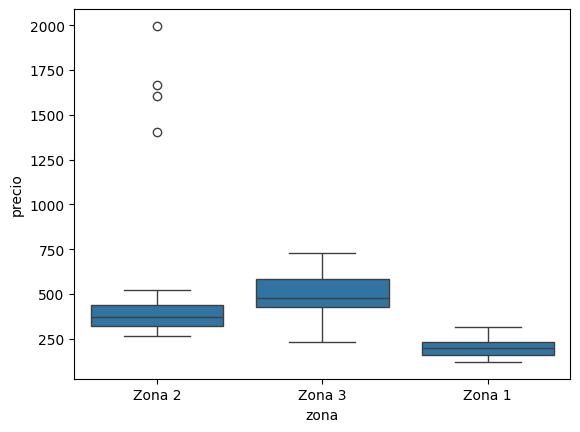

In [36]:
sns.boxplot(datos_outliers, x='zona',y='precio')

In [47]:
zona1_outliers= datos_outliers[datos_outliers['zona']=="Zona 1"]
modelo_1_bis = linear_model.LinearRegression()
modelo_1_bis.fit(zona1_outliers[['superficie']],zona1_outliers['precio'])
print("Nuevo B_1:",modelo_1_bis.coef_)
print("Nuevo B_0:",modelo_1_bis.intercept_)
print("B_1 sin outliers:", z1_beta_1)
print("B_0 sin outliers:", z1_beta_0)

Nuevo B_1: [2.44208139]
Nuevo B_0: 58.85200024117228
B_1 sin outliers: [2.44208139]
B_0 sin outliers: 58.852000241172306


In [46]:
zona2_outliers= datos_outliers[datos_outliers['zona']=="Zona 2"]
modelo_2_bis = linear_model.LinearRegression()
modelo_2_bis.fit(zona2_outliers[['superficie']],zona2_outliers['precio'])
print("Nuevo B_1:",modelo_2_bis.coef_)
print("Nuevo B_0:",modelo_2_bis.intercept_)
print("B_1 sin outliers:", z2_beta_1)
print("B_0 sin outliers:", z2_beta_0)

Nuevo B_1: [4.26653981]
Nuevo B_0: 72.89381076100466
B_1 sin outliers: [3.206279]
B_0 sin outliers: 80.73010925558549


In [45]:
zona3_outliers= datos_outliers[datos_outliers['zona']=="Zona 3"]
modelo_3_bis = linear_model.LinearRegression()
modelo_3_bis.fit(zona3_outliers[['superficie']],zona3_outliers['precio'])
print("Nuevo B_1:",modelo_3_bis.coef_)
print("Nuevo B_0:",modelo_3_bis.intercept_)
print("B_1 sin outliers:", z3_beta_1)
print("B_0 sin outliers:", z3_beta_0)

Nuevo B_1: [4.56054427]
Nuevo B_0: 24.966485225784936
B_1 sin outliers: [4.56054427]
B_0 sin outliers: 24.966485225784936


Tiene sentido que solo cambien los caeficientes de la zona 2 por que es la unica con outliers

# Ejercicio 3

En el archivo bitcoin.csv se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014
hasta el 19/02/2022 1. Cargamos el dataset:

In [2]:
btc = pd.read_csv('..\Labo de datos\Bitcoin.csv')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Nos interesa analizar la evolución del precio de cierre (Close) en periodo comprendido entre el
01/01/2021 y el 01/07/2021:

In [3]:
# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd.to_datetime(btc['Date'], format ='%Y-%m-%d')

# Filtramos el dataset en el periodo de interes
btc_2021 = btc [(btc['Date']>"2021-01-01") & (btc['Date']<"2021-07-01")]

Visualizar el ajuste lineal para los datos del dataframe btc_2021. En este caso, ¿resulta más conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

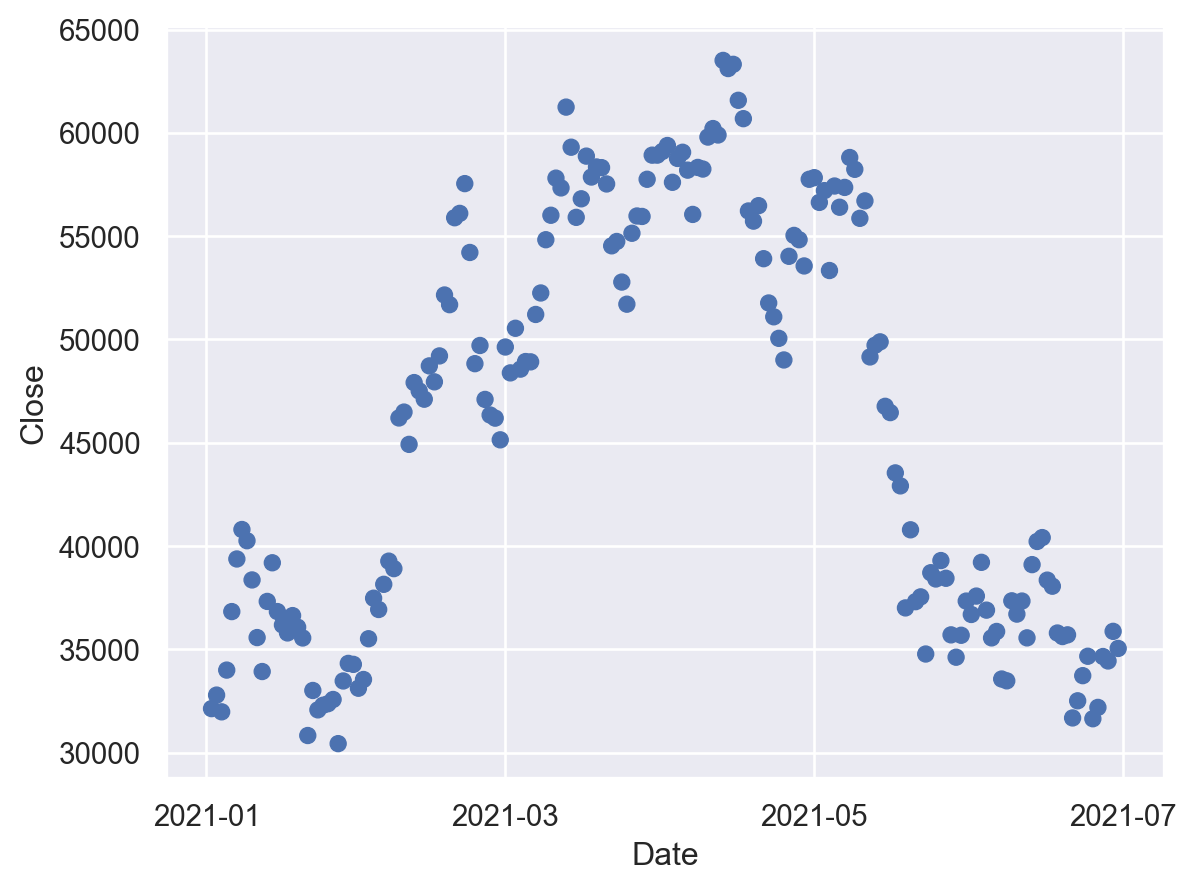

In [4]:
(
    so.Plot(btc_2021, x="Date", y="Close")
    .add(so.Dot())
)

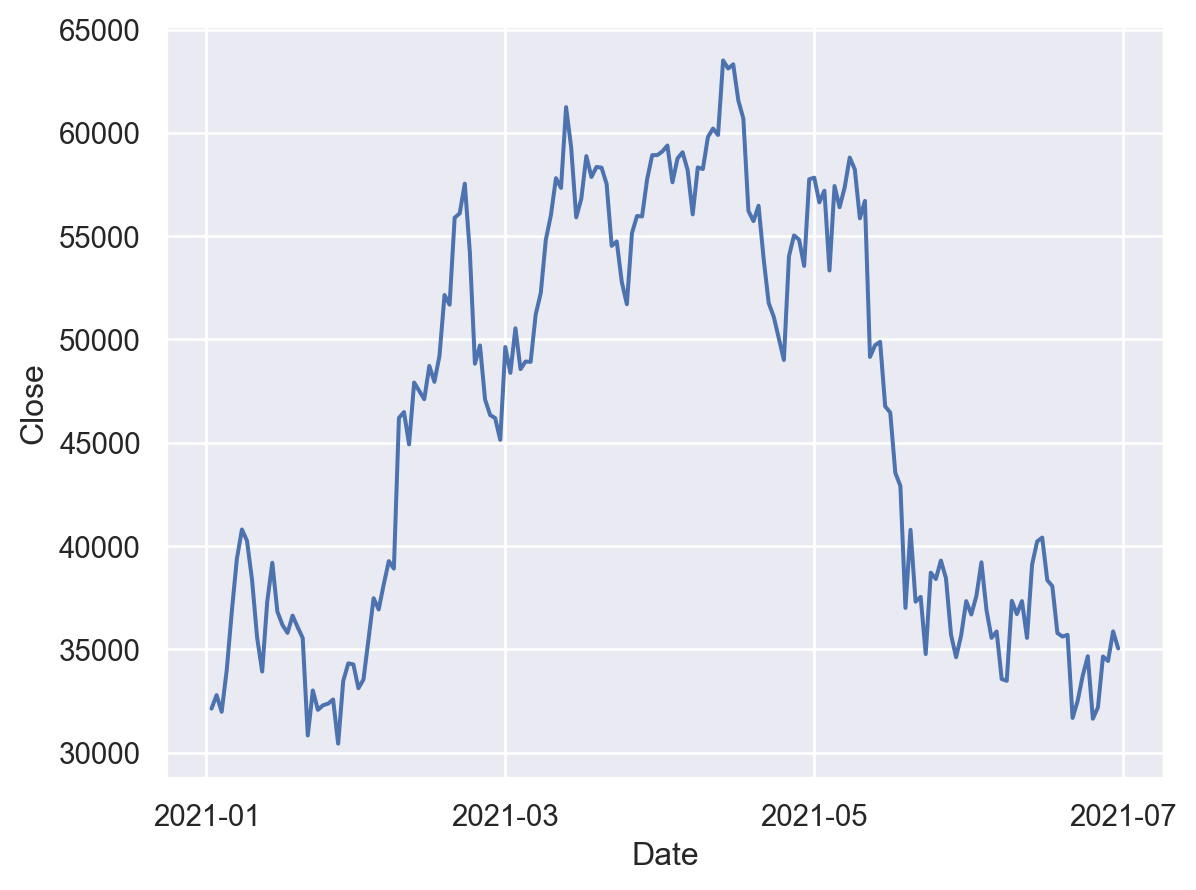

In [5]:
(
    so.Plot(btc_2021, x="Date", y="Close")
    .add(so.Line())
)

Quiza sea mas util el de lineas

# Ejercicio 4

Utilizando el dataset tips de seaborn:
datos = sns. load_dataset ('tips ')
realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill y la variable Y es tip.

In [48]:
datos = sns.load_dataset('tips')

In [49]:
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
modelo_tips=linear_model.LinearRegression()
varX= pd.DataFrame(datos['total_bill']-np.mean(datos['total_bill']))
modelo_tips.fit(varX,datos['tip'])

LinearRegression()

(a) ¿Qué interpretación se le puede dar a β0? Pista: calcular el promedio de las propinas.

In [55]:
print(np.mean(datos['total_bill']))
varX.head()

19.78594262295082


,total_bill
0,-2.795943
1,-9.445943
2,1.224057
3,3.894057
4,4.804057


In [57]:
beta_0 = modelo_tips.intercept_
print("Promedio de propinas:",np.mean(datos['tip']))
print("Beta_0:",beta_0)

Promedio de propinas: 2.99827868852459
Beta_0: 2.99827868852459


El beta_0 es el promedio de las propinas

(b) ¿Cambia el valor de β1 respecto a la Regresión Lineal de total_bill vs. tip?

In [58]:
modelo_tips.coef_

array([0.10502452])

In [62]:
modelo_tips_2= linear_model.LinearRegression()
modelo_tips_2.fit(datos[['total_bill']], datos['tip'])
print(modelo_tips_2.coef_)

[0.10502452]


Beta_1 no cambia

# Ejercicio 5

5. En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año
(Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y su
expectativa de vida (Life_Expectancy).
Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la
dependiente será Life_Expectancy.

In [3]:
datos= sns.load_dataset('healthexp')

In [4]:
datos= datos[datos["Country"]=='Japan']
datos.head()

,Year,Country,Spending_USD,Life_Expectancy
3,1970,Japan,150.437,72.0
8,1971,Japan,163.854,72.9
11,1972,Japan,185.390,73.2
14,1973,Japan,205.778,73.4
17,1974,Japan,242.018,73.7


(a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
gráfico.


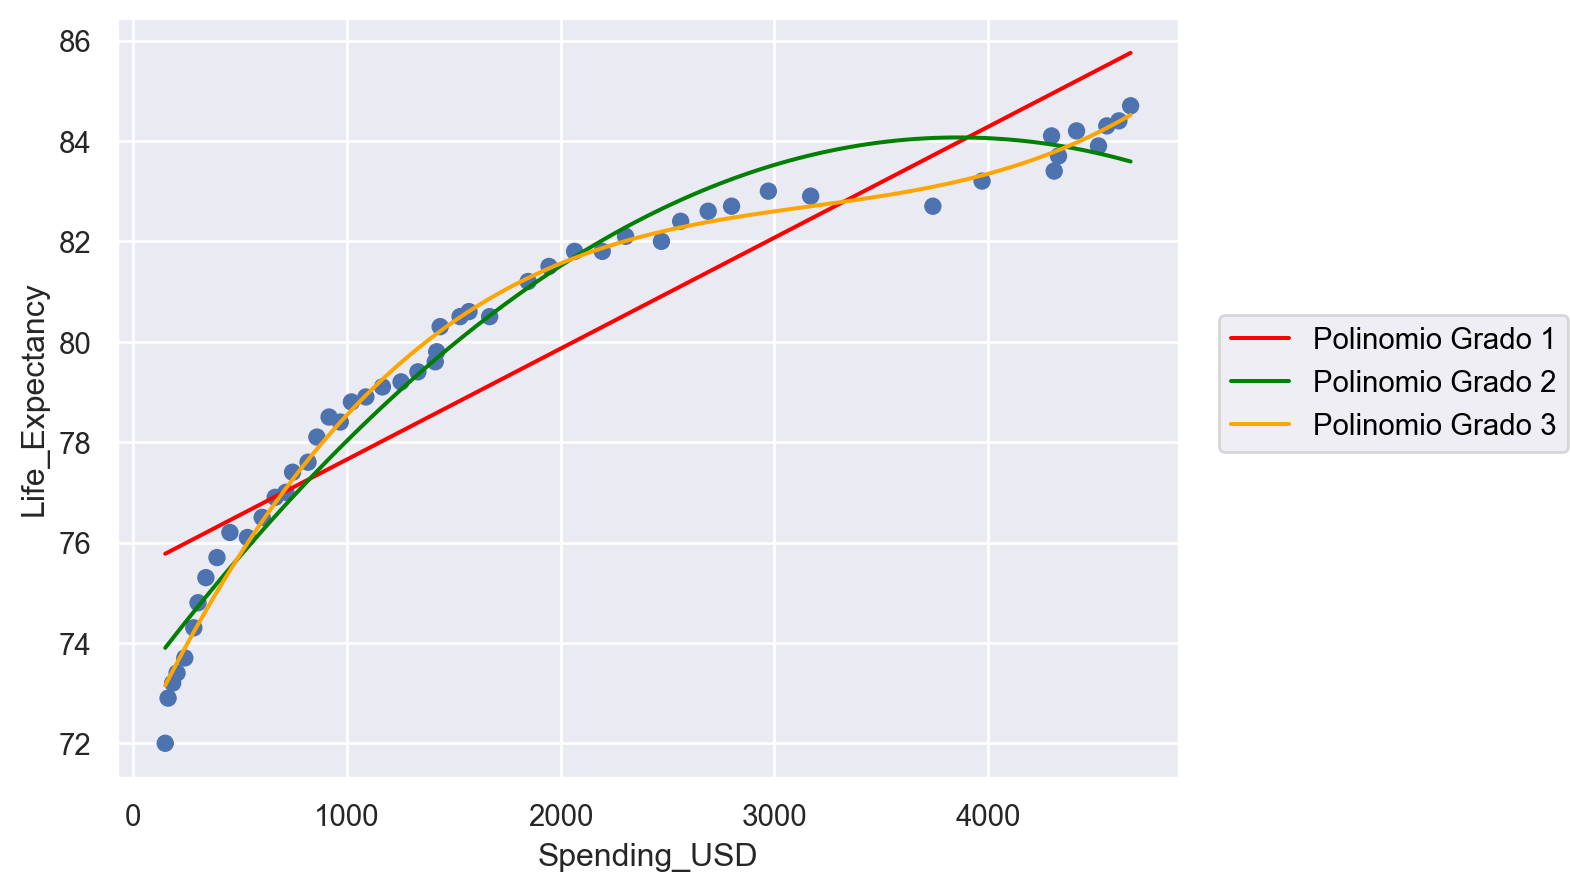

In [5]:
(
    so.Plot(datos, x='Spending_USD', y='Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(1), label="Polinomio Grado 1")
    .add(so.Line(color='green'), so.PolyFit(2), label="Polinomio Grado 2")
    .add(so.Line(color='orange'), so.PolyFit(3), label="Polinomio Grado 3")
)

(b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor
ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.


El que mejor ajusta es el de grado 3

In [13]:
polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
x_poly_2 = polynomial_features_2.fit_transform(datos[['Spending_USD']])
modelo_2 = linear_model.LinearRegression()
modelo_2.fit(x_poly_2, datos['Life_Expectancy'])
print("Coeficiente B_0 de Polinomio de Grado 2:", modelo_2.intercept_)
print("Coeficiente B_1 de Polinomio de Grado 2:", modelo_2.coef_[0])
print("Coeficiente B_2 de Polinomio de Grado 3:", modelo_2.coef_[1])
#Este no iba pero no lo voy a borrar

Coeficiente B_0 de Polinomio de Grado 2: 73.05935577258123
Coeficiente B_1 de Polinomio de Grado 2: 0.005704633488768538
Coeficiente B_2 de Polinomio de Grado 3: -7.389103014242886e-07


In [15]:
polynomial_features_3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly_3 = polynomial_features_3.fit_transform(datos[['Spending_USD']])
modelo_3 = linear_model.LinearRegression()
modelo_3.fit(x_poly_3, datos['Life_Expectancy'])
print("Coeficiente B_0 de Polinomio de Grado 2:", modelo_3.intercept_)
print("Coeficiente B_1 de Polinomio de Grado 2:", modelo_3.coef_[0])
print("Coeficiente B_2 de Polinomio de Grado 3:", modelo_3.coef_[1])
print("Coeficiente B_3 de Polinomio de Grado 3:", modelo_3.coef_[2])

Coeficiente B_0 de Polinomio de Grado 2: 71.84403247811414
Coeficiente B_1 de Polinomio de Grado 2: 0.00909766222027931
Coeficiente B_2 de Polinomio de Grado 3: -2.684173321376585e-06
Coeficiente B_3 de Polinomio de Grado 3: 2.8216848452775663e-10


(c) Calcular el R2 y el ECM.

In [23]:
y_pred = modelo_3.predict(x_poly_3)
print("R^2:",r2_score(datos['Life_Expectancy'], y_pred))
print("MSE:",mean_squared_error(datos['Life_Expectancy'], y_pred))

R^2: 0.9912790933475436
MSE: 0.10758286138707222


(d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida
de los habitantes de Japón si el país invirtiera U$D 5000.

In [27]:
modelo_3.predict([[5000,5000**2,5000**3]]).item()

85.49907111106565

(e) Visualizar el polinomio de grado 10 que mejor ajusta a los datos. ¿Se aprecia una mejora?
¿Resulta conveniente ajustar con un polinomio de grado 50?

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core\groupby.py:113: RankWarning: Polyfit may be poorly conditioned
  return self._reorder_columns(func(data, *args, **kwargs), data)


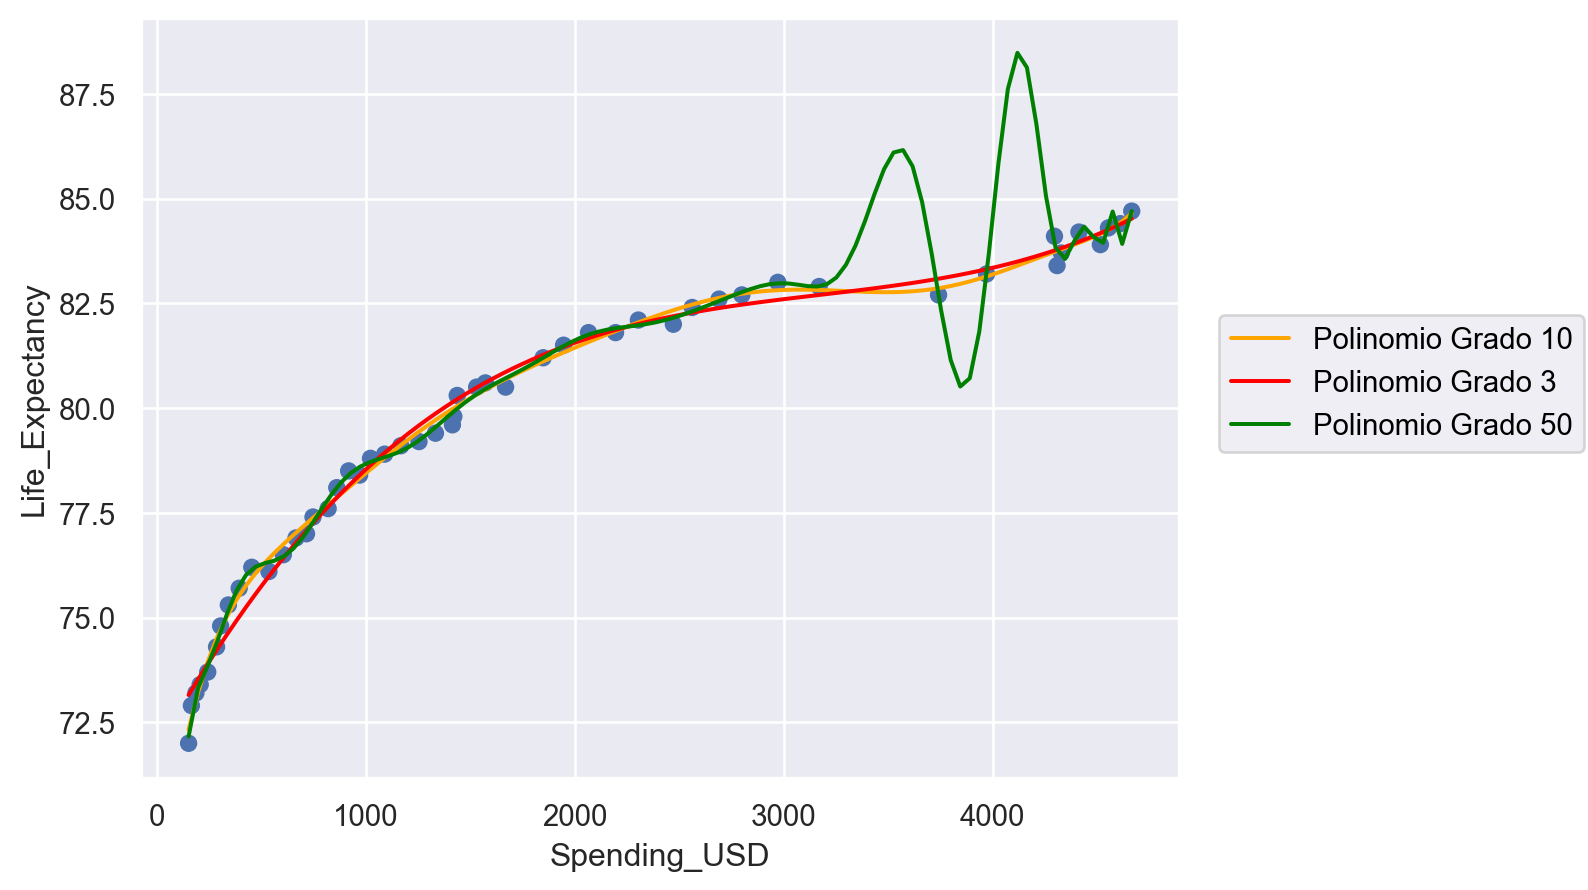

In [6]:
(
    so.Plot(datos, x='Spending_USD', y='Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='orange'), so.PolyFit(10), label="Polinomio Grado 10")
    .add(so.Line(color='red'), so.PolyFit(3), label="Polinomio Grado 3")
    .add(so.Line(color='green'), so.PolyFit(50), label="Polinomio Grado 50")
)

No conviene el de grado 50 porque overfittea, y el de grado 10 no difiere muucho del de grado 3